In [1]:
#exp3 (gamma/theta power before and after LTP, no Ketamine)
import numpy as np
from matplotlib import pyplot as plt
import seedavg

x=np.arange(2)

Data=np.load("recfolder/oldData.npy",allow_pickle=True)
DatShape=np.shape(Data)[0],np.shape(Data)[1],len(Data[0,0][0])
DatShape2=np.shape(Data)[0],np.shape(Data)[1],2
Dat=np.ones(DatShape)*-1      
Dat2=np.ones(DatShape2)*-1 
f=Data[0,0][0]
for i in range(len(Data)):
    for j in range(len(Data[0])):
        print("Data shape=",np.shape(Data),"Dataij=",Data[i,j], "at i,j=",i,j)
        Dat[i,j]=Data[i,j][1]          #build proper Tensor
        Dat2[i,j,:]=Data[i,j][2:4]
dat=np.array(Dat,dtype=float)
dat2=np.array(Dat2,dtype=float)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
def bandpower(f,p,start, end):# integrates a spectral power (input freqs and powers) from start to end in frequenzy space
        bpow=0
        for i in range(len(p)):
            if start<f[i] and f[i]<end: bpow+=p[i]*(f[1]-f[0])
        return bpow 


In [2]:
print("difs:")
difs=dat2[0,:,1]-dat2[1,:,1]
print(difs)
print("gamma change=",np.average(difs),"+-",np.std(difs)/(len(difs)-1)**.5)
pows=np.average(dat2,axis=1)
pows_std=np.std(dat2,axis=1)/(len(dat2[0])-1)**.5
print(pows)

difs:
[-0.22456168 -0.09156826 -0.95524628  0.30938971 -0.3441928 ]
('gamma change=', -0.26123586416758665, '+-', 0.2054602084890402)
[[2.2553696  4.97322706]
 [2.27382851 5.23446293]]


Text(0.5,1,'before vs. after LTP')

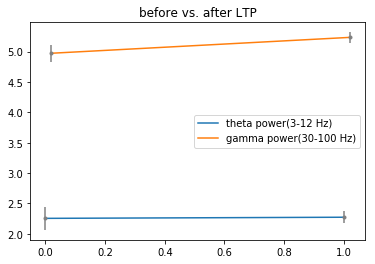

In [3]:
plt.plot(x,pows[:,0],label="theta power(3-12 Hz)")
plt.errorbar(x=x,y=pows[:,0],yerr=pows_std[:,0],color="grey",fmt='.')
plt.plot(x+0.02,pows[:,1],label="gamma power(30-100 Hz)")
plt.errorbar(x=x+0.02,y=pows[:,1],yerr=pows_std[:,1],color="grey",fmt=".")
plt.legend()
plt.title("before vs. after LTP")




In [21]:
from scipy import signal

<IPython.core.display.Javascript object>


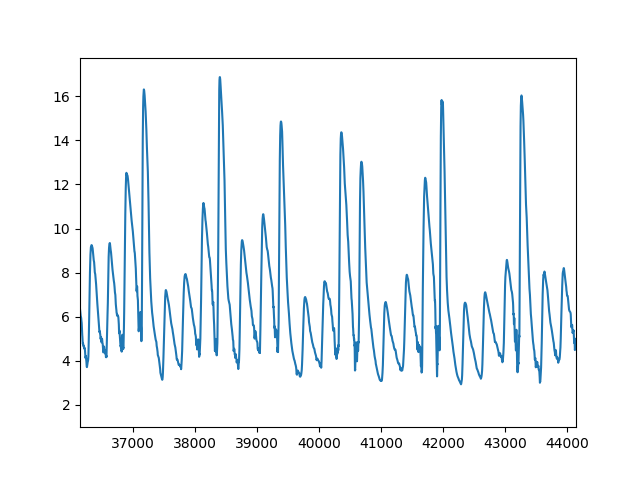

In [54]:
%matplotlib notebook
cs1=Data[0,0]
t1=cs1[-1]
plt.plot(t1)
plt.show()

<IPython.core.display.Javascript object>


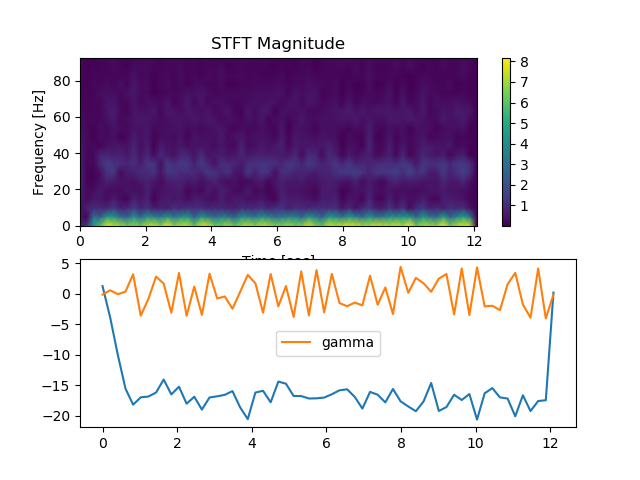

fin


In [59]:
%matplotlib notebook
f, t, Zxx = signal.stft(t1, fs=1e4, window='hann', nperseg=2048, noverlap=0)
f=f[:20]
Zxx=Zxx[:20]
plt.subplot(2,1,1)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(2,1,2)
bandt=[]
bandg=[]
for i in range(len(t)):
    thet=bandpower(f,Zxx[:,i],3,12)
    gamm=bandpower(f,Zxx[:,i],30,100)
    bandt.append(thet)
    bandg.append(gamm)
plt.plot(t,bandt)
plt.plot(t,bandg,label="gamma")
plt.legend()
print("fin")

In [57]:
f


array([ 0.       ,  4.8828125,  9.765625 , 14.6484375, 19.53125  ,
       24.4140625, 29.296875 , 34.1796875, 39.0625   , 43.9453125,
       48.828125 , 53.7109375, 58.59375  , 63.4765625, 68.359375 ,
       73.2421875, 78.125    , 83.0078125, 87.890625 , 92.7734375])